In [15]:
from __future__ import print_function
import argparse
import datetime
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from IPython.display import clear_output
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.nn.parallel
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torchvision.utils import save_image
from torch.autograd import Variable
from torch.utils.data import SubsetRandomSampler

In [ ]:
!pip install google collab

  Preparing metadata (setup.py) ... done
  Created wheel for collab: filename=collab-1.0.198-py3-none-any.whl size=20105 sha256=234a9ecdf3dd590166d74019c43a1c76bd6e15722cf2543e22cb190d2a4a82de
  Stored in directory: /root/.cache/pip/wheels/f5/e1/3d/bac4201cfa08172837cb6af844d04d61d5139906ec312ac09f
Successfully built collab


In [ ]:
# class netG(nn.Module):

#     def __init__(self, nz, ngf, nc):

#         super(netG, self).__init__()
#         self.ReLU = nn.ReLU(True)
#         self.Tanh = nn.Tanh()
#         self.DropOut = nn.Dropout(p=0.75)
#         #self.conv0 = nn.ConvTranspose2d(nz, ngf * 16, 4, 1, 1, bias=False)
#         #self.BatchNorm0 = nn.BatchNorm2d(ngf * 16)
#         self.conv1 = nn.ConvTranspose2d(nz, ngf * 8, 5, 1, 0, bias=False)
#         self.BatchNorm1 = nn.BatchNorm2d(ngf * 8)

#         self.conv2 = nn.ConvTranspose2d(ngf * 8, ngf * 4, 5, 2, 2, bias=False)
#         self.BatchNorm2 = nn.BatchNorm2d(ngf * 4)

#         self.conv3 = nn.ConvTranspose2d(ngf * 4, ngf * 2, 5, 2, 2, bias=False)
#         self.BatchNorm3 = nn.BatchNorm2d(ngf * 2)

#         self.conv4 = nn.ConvTranspose2d(ngf * 2, ngf * 1, 4, 2, 2, bias=False)
#         self.BatchNorm4 = nn.BatchNorm2d(ngf * 1)

#         self.conv5 = nn.ConvTranspose2d(ngf * 1, nc, 4, 2, 1, bias=False)

#         self.apply(weights_init)


#     def forward(self, input):
#         #x = self.conv0(input)
#         #x = self.BatchNorm0(x)
#         #x = self.ReLU(x)
#         x = self.conv1(input)
#         x = self.BatchNorm1(x)
#         x = self.ReLU(x)
#         #x = self.DropOut(x)

#         x = self.conv2(x)
#         x = self.BatchNorm2(x)
#         x = self.ReLU(x)
#         x = self.DropOut(x)

#         x = self.conv3(x)
#         x = self.BatchNorm3(x)
#         x = self.ReLU(x)
#         #x = self.DropOut(x)

#         x = self.conv4(x)
#         x = self.BatchNorm4(x)
#         x = self.ReLU(x)
#         #x = self.DropOut(x)

#         x = self.conv5(x)
#         output = self.Tanh(x)
#         return output

In [5]:
import torch.nn as nn

class netG(nn.Module):
    """
    Generator network for GAN (ACGAN).

    Args:
        nz (int): Size of the latent vector (input noise dimension).
        ngf (int): Number of generator feature maps.
        nc (int): Number of channels in the output image (e.g., 3 for RGB).

    Architecture:
        - Series of ConvTranspose2d layers with BatchNorm and ReLU activations.
        - Final output uses Tanh activation to generate images in range [-1, 1].
    """

    def __init__(self, nz, ngf, nc):
        super(netG, self).__init__()

        self.ReLU = nn.ReLU(True)
        self.Tanh = nn.Tanh()

        # Optional: Uncomment for a deeper network
        # self.DropOut = nn.Dropout(p=0.75)
        # self.conv0 = nn.ConvTranspose2d(nz, ngf * 16, 4, 1, 1, bias=False)
        # self.BatchNorm0 = nn.BatchNorm2d(ngf * 16)

        self.conv1 = nn.ConvTranspose2d(nz, ngf * 8, 4, 1, 0, bias=False)
        self.BatchNorm1 = nn.BatchNorm2d(ngf * 8)

        self.conv2 = nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False)
        self.BatchNorm2 = nn.BatchNorm2d(ngf * 4)

        self.conv3 = nn.ConvTranspose2d(ngf * 4, ngf * 2, 4, 2, 1, bias=False)
        self.BatchNorm3 = nn.BatchNorm2d(ngf * 2)

        self.conv4 = nn.ConvTranspose2d(ngf * 2, ngf * 1, 4, 2, 1, bias=False)
        self.BatchNorm4 = nn.BatchNorm2d(ngf * 1)

        self.conv5 = nn.ConvTranspose2d(ngf * 1, nc, 4, 2, 1, bias=False)

        # Initialize weights
        self.apply(weights_init)

    def forward(self, input):
        """
        Defines the forward pass of the generator network.

        Args:
            input (Tensor): Random noise vector of shape (batch_size, nz, 1, 1)

        Returns:
            Tensor: Generated image of shape (batch_size, nc, H, W)
        """

        # x = self.conv0(input)
        # x = self.BatchNorm0(x)
        # x = self.ReLU(x)

        x = self.conv1(input)
        x = self.BatchNorm1(x)
        x = self.ReLU(x)
        # x = self.DropOut(x)

        x = self.conv2(x)
        x = self.BatchNorm2(x)
        x = self.ReLU(x)
        # x = self.DropOut(x)

        x = self.conv3(x)
        x = self.BatchNorm3(x)
        x = self.ReLU(x)
        # x = self.DropOut(x)

        x = self.conv4(x)
        x = self.BatchNorm4(x)
        x = self.ReLU(x)
        # x = self.DropOut(x)

        x = self.conv5(x)
        output = self.Tanh(x)

        return output


In [12]:
import torch.nn as nn

class netD(nn.Module):
    def __init__(self, ndf, nc, nb_label):
        """
        Discriminator network for GAN (ACGAN).

        Args:
            ndf (int): Number of discriminator feature maps.
            nc (int): Number of input image channels (e.g., 3 for RGB).
            nb_label (int): Number of classes/labels for auxiliary classification.

        Architecture:
            - Series of Conv2d layers with BatchNorm, LeakyReLU, and Dropout.
            - Produces two outputs:
                1. `s`: Real/Fake probability (sigmoid output).
                2. `c`: Class probabilities for input image (softmax output).
        """
        super(netD, self).__init__()
        self.LeakyReLU = nn.LeakyReLU(0.2, inplace=True)
        self.DropOut1 = nn.Dropout(p=0.5)
        self.DropOut2 = nn.Dropout(p=0.25)

        # Input image → ndf feature maps
        self.conv1 = nn.Conv2d(nc, ndf, 4, 2, 1, bias=False)

        # Downsample and expand channels progressively
        self.conv2 = nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False)
        self.BatchNorm2 = nn.BatchNorm2d(ndf * 2)

        self.conv3 = nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False)
        self.BatchNorm3 = nn.BatchNorm2d(ndf * 4)

        self.conv4 = nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False)
        self.BatchNorm4 = nn.BatchNorm2d(ndf * 8)

        # Final convolution to compress into 1D feature vector
        self.conv5 = nn.Conv2d(ndf * 8, ndf * 1, 4, 1, 0, bias=False)

        # Linear layer for real/fake discrimination
        self.disc_linear = nn.Linear(ndf * 1, 1)

        # Linear layer for auxiliary classification (multi-class output)
        self.aux_linear = nn.Linear(ndf * 1, nb_label)

        self.softmax = nn.Softmax(dim=1)
        self.sigmoid = nn.Sigmoid()
        self.ndf = ndf
        self.apply(weights_init)

    def forward(self, input):
        """
        Forward pass of the discriminator.

        Args:
            input (Tensor): Input image tensor of shape (B, nc, H, W)

        Returns:
            s (Tensor): Real/Fake prediction (B, 1)
            c (Tensor): Class prediction (B, nb_label)
        """
        x = self.conv1(input)
        x = self.LeakyReLU(x)
        x = self.DropOut1(x)

        x = self.conv2(x)
        x = self.BatchNorm2(x)
        x = self.LeakyReLU(x)

        x = self.conv3(x)
        x = self.BatchNorm3(x)
        x = self.LeakyReLU(x)
        x = self.DropOut1(x)

        x = self.conv4(x)
        x = self.BatchNorm4(x)
        x = self.LeakyReLU(x)
        x = self.DropOut2(x)

        x = self.conv5(x)
        x = x.view(-1, self.ndf * 1)

        c = self.aux_linear(x)
        c = self.softmax(c)

        s = self.disc_linear(x)
        s = self.sigmoid(s)

        return s, c


In [13]:
def weights_init(m):
    """
    Custom weight initialization for the network layers.

    Applies:
    - Normal distribution with mean 0 and std 0.02 to weights of convolutional layers.
    - Normal distribution with mean 1 and std 0.02 to weights of batch normalization layers.
    - Zero initialization to biases of batch normalization layers.

    Args:
        m (nn.Module): A PyTorch module (layer) whose class name will be checked for custom initialization.
    """

    classname = m.__class__.__name__

    # Initialize convolutional layers
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.02)

    # Initialize batch normalization layers
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive


In [16]:
# Set device to GPU if available, else fallback to CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Directory containing training data
data_dir = 'Thyroid data/DU'

# Hyperparameters
batch_size = 16                  # Number of images per batch
num_epochs = 200                 # Number of training epochs
imageSize = 64                   # All images will be resized to this dimension (64x64)
nc = 1                           # Number of image channels (1 for grayscale, 3 for RGB)
nz = 100                         # Size of latent vector (input to generator)
ngf = 64                         # Generator feature map size
ndf = 64                         # Discriminator feature map size
nb_label = 1                     # Number of auxiliary labels for classification (e.g., 1 for binary)
lr = 0.0001                      # Learning rate for generator
lr_d = 0.0002                    # Learning rate for discriminator
beta1 = 0.5                      # Beta1 for Adam optimizer
beta2 = 0.999                    # Beta2 for Adam optimizer

# Real and fake labels for training the discriminator
real_label = 1.
fake_label = 0.

# Fixed noise vector for generating samples during training progress checks
fixed_noise = torch.randn(64, nz, 1, 1, device=device)

# Loss functions
s_criterion = nn.BCELoss().to(device)     # Binary Cross-Entropy for real/fake discrimination
c_criterion = nn.NLLLoss().to(device)     # Negative Log-Likelihood for classification loss

# Tensors for training loop (pre-allocated to avoid reallocating memory every iteration)
input = torch.FloatTensor(batch_size, 1, imageSize, imageSize).to(device)         # Real input images
noise = torch.FloatTensor(batch_size, nz, 1, 1).to(device)                        # Random noise for generator
fixed_noise = torch.FloatTensor(batch_size, nz, 1, 1).normal_(0, 1).to(device)    # Fixed noise for visualization
s_label = torch.FloatTensor(batch_size).to(device)                                # Discriminator labels (real/fake)
c_label = torch.LongTensor(batch_size).to(device)                                 # Class labels

# Wrap in Variables (optional in latest PyTorch but may be required if legacy code)
input = Variable(input)
s_label = Variable(s_label)
c_label = Variable(c_label)
noise = Variable(noise)
fixed_noise = Variable(fixed_noise)

# Fixed noise setup with embedded label information
fixed_noise_ = np.random.normal(0, 1, (batch_size, nz))                           # Sample normal noise
random_label = np.random.randint(0, nb_label, batch_size)                         # Random class labels

#print('fixed label:{}'.format(random_label))
random_onehot = np.zeros((batch_size, nb_label))                                  # One-hot encoding matrix
random_onehot[np.arange(batch_size), random_label] = 1                            # Set proper one-hot vectors
fixed_noise_[np.arange(batch_size), :nb_label] = random_onehot[np.arange(batch_size)]  # Inject label info

# Convert fixed noise with label injection to a torch tensor
fixed_noise_ = torch.from_numpy(fixed_noise_)
fixed_noise_ = fixed_noise_.resize_(batch_size, nz, 1, 1)

# Copy it into fixed_noise tensor used in training/visualization
fixed_noise.data.copy_(fixed_noise_)


tensor([[[[ 1.0000]],

         [[-0.3725]],

         [[ 1.2678]],

         ...,

         [[ 1.9144]],

         [[ 1.1028]],

         [[ 0.6586]]],


        [[[ 1.0000]],

         [[ 0.4419]],

         [[ 1.3050]],

         ...,

         [[-0.5278]],

         [[ 0.3732]],

         [[ 0.4181]]],


        [[[ 1.0000]],

         [[-2.4612]],

         [[ 0.3938]],

         ...,

         [[-0.2617]],

         [[-0.8231]],

         [[-0.2291]]],


        ...,


        [[[ 1.0000]],

         [[-0.4952]],

         [[-0.4887]],

         ...,

         [[-0.2348]],

         [[-0.2728]],

         [[ 0.0697]]],


        [[[ 1.0000]],

         [[-0.1366]],

         [[ 0.4707]],

         ...,

         [[-0.2942]],

         [[ 0.1358]],

         [[ 0.2803]]],


        [[[ 1.0000]],

         [[-0.3437]],

         [[-0.6801]],

         ...,

         [[ 0.2745]],

         [[-0.5079]],

         [[ 1.3225]]]], device='cuda:0')

In [17]:
# Create necessary directories for model saving, plots, and outputs
for func in [
    lambda: os.mkdir(os.path.join('.', 'augGAN')),
    lambda: os.mkdir(os.path.join('.', 'augGAN/model/ACGAN')),
    lambda: os.mkdir(os.path.join('.', 'augGAN/plots/ACGAN')),
    lambda: os.mkdir(os.path.join('.', 'augGAN/output_images/ACGAN'))]:  # create directories
  try:
    func()
  except Exception as error:
    print(error)
    continue

# Fields to track training metrics
METRIC_FIELDS = [
    'train.D_x',       # Discriminator output on real images
    'train.D_G_z1',    # Discriminator output on fake images (before backprop to G)
    'train.D_G_z2',    # Discriminator output on fake images (after backprop to G)
    'train.G_losses',  # Generator loss
    'train.D_losses',  # Discriminator loss
]
metrics = {field: list() for field in METRIC_FIELDS}


# Define image transformations based on number of channels
if nc==1:
    mu = (0.5)
    sigma = (0.5)
    transform = transforms.Compose([#transforms.RandomHorizontalFlip(),
                                    transforms.Grayscale(num_output_channels=1), # Convert to grayscale if not already
                                    transforms.Resize((64,64)), # Resize to match input dimensions
                                    #transforms.Scale(imageSize),
                                    transforms.ToTensor(), # Convert image to tensor
                                    transforms.Normalize(mu, sigma) # Normalize pixel values
                                    ])
elif nc==3:
    mu = (0.5,0.5,0.5)
    sigma = (0.5,0.5,0.5)
    #Originally authors used just scaling
    transform = transforms.Compose([#transforms.RandomHorizontalFlip(),
                                    transforms.Resize((64,64)),
                                    #transforms.Scale(imageSize),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mu, sigma)])
else:
    # Load dataset from specified directory and apply transformations
    print("Tranformation not defined for this option")
train_set = datasets.ImageFolder(os.path.join(data_dir, "Train/"), transform=transform)

# Data loader to iterate through dataset in batches
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
                                          shuffle=True)

# Initialize Generator and Discriminator models
generator = netG(nz, ngf, nc).to(device)
discriminator = netD(ndf, nc, nb_label).to(device)

# setup optimizer
optimizerD = optim.Adam(discriminator.parameters(), lr=lr_d, betas=(beta1, beta2))
optimizerG = optim.Adam(generator.parameters(), lr=lr, betas=(beta1, beta2))

[Errno 2] No such file or directory: './augGAN/model/ACGAN'
[Errno 2] No such file or directory: './augGAN/plots/ACGAN'
[Errno 2] No such file or directory: './augGAN/output_images/ACGAN'


FileNotFoundError: [Errno 2] No such file or directory: 'Thyroid data/DU/Train/'

In [18]:
#Print the architecture of generator and discriminator model
print(generator)
print(discriminator)

# Show detailed layer-wise summary of the generator and discriminator model
from torchsummary import summary

summary(generator, (100, 1, 1))
summary(discriminator, (1, 64, 64))

NameError: name 'generator' is not defined

In [22]:
def test(predict, labels):

    """
       Evaluates prediction accuracy.

       Args:
            predict (Tensor): The predicted logits or probabilities from the model.
            labels (Tensor): The true class labels.

      Returns:
            correct (int): Number of correctly predicted labels.
            total (int): Total number of samples evaluated.
          """


    correct = 0

    # Get the index of the maximum predicted score for each input (predicted class)
    pred = predict.data.max(1)[1]

    # Compare predicted classes with true labels and count correct predictions
    correct = pred.eq(labels.data).cpu().sum()

    return correct, len(labels.data)

In [23]:
for epoch in range(num_epochs):
    for i, data in enumerate(tqdm(train_loader, 0)):
        ###########################
        # (1) Update D network
        ###########################

        # train with real
        discriminator.zero_grad()

        # Load real images and labels
        img, label = data
        batch_size = img.size(0)

        # Prepare real inputs and labels (for real/fake and class)
        with torch.no_grad():
            input.resize_(img.size()).copy_(img)
            s_label.resize_(batch_size).fill_(real_label) # Scalar labels for real/fake
            c_label.resize_(batch_size).copy_(label)      # Class labels

        #Pass real images through discriminator
        s_output, c_output = discriminator(input)

        # Calculate discriminator losses on real images
        s_label = s_label.unsqueeze(1) # Add an extra dimension to s_label, matching for binary loss
        s_errD_real = s_criterion(s_output, s_label) # Real/fake loss
        c_errD_real = c_criterion(c_output, c_label) # Class prediction loss
        errD_real = s_errD_real + c_errD_real # Total loss for real images
        errD_real.backward()                  # Backpropagate

        D_x = s_output.data.mean()            # Confidence on real images

        # Evaluate classification accuracy on real images
        correct, length = test(c_output, c_label)

        # ---- Train Discriminator with Fake Images ----

        # Generate noise for the generator
        with torch.no_grad():
            noise.resize_(batch_size, nz, 1, 1)
            noise.normal_(0, 1)

        # Create random class labels and convert to one-hot
        label = np.random.randint(0, nb_label, batch_size)
        noise_ = np.random.normal(0, 1, (batch_size, nz))
        label_onehot = np.zeros((batch_size, nb_label))
        label_onehot[np.arange(batch_size), label] = 1
        noise_[np.arange(batch_size), :nb_label] = label_onehot[np.arange(batch_size)]

        # Convert to Torch tensor
        noise_ = (torch.from_numpy(noise_))
        noise_ = noise_.resize_(batch_size, nz, 1, 1)
        noise.data.copy_(noise_)

        c_label.data.resize_(batch_size).copy_(torch.from_numpy(label))

        # Generate fake images
        fake = generator(noise)

        # Prepare discrimnator labels for fake data
        s_label.data.fill_(fake_label)

        # Pass fake images through discriminator
        s_output,c_output = discriminator(fake.detach())

        # Calculate discriminator losses on fake images
        s_errD_fake = s_criterion(s_output, s_label)
        c_errD_fake = c_criterion(c_output, c_label)
        errD_fake = s_errD_fake + c_errD_fake
        errD_fake.backward()

        D_G_z1 = s_output.data.mean() #Confidence

        # Total loss
        errD = s_errD_real + s_errD_fake
        optimizerD.step() #Update discriminator

        ################################
        # (2) Update Generator network #
        ################################
        generator.zero_grad()
        s_label.data.fill_(real_label)  # fake labels are real for generator cost
        s_output,c_output = discriminator(fake) # Re-pass fake images (not detached) through discriminator

        # Calculate generator losses
        s_errG = s_criterion(s_output, s_label) # Fool discriminator
        c_errG = c_criterion(c_output, c_label) # Match class labels

        errG = s_errG + c_errG
        errG.backward()
        D_G_z2 = s_output.data.mean() #Confidence on fake images after update
        optimizerG.step() # Update generator

        # Save metrics
        metrics['train.G_losses'].append(errG.item())
        metrics['train.D_losses'].append(errD.item())


        #Logging training status
        print('[%d/%d][%d/%d] Loss_D: %.4f Loss_G: %.4f D(x): %.4f D(G(z)): %.4f / %.4f, Accuracy: %.4f / %.4f = %.4f'
              % (epoch, num_epochs, i, len(train_loader),
                 errD.data, errG.data, D_x, D_G_z1, D_G_z2,
                 correct, length, 100.* correct / length))
        # Save image samples every 100 iterations
        if i % 100 == 0:
            vutils.save_image(img,
                    '%s/real_samples.png' % './augGAN/output_images/ACGAN', normalize=True)
            #fake = netG(fixed_cat)
            fake = generator(fixed_noise)
            vutils.save_image(fake.data,
                    '%s/fake_samples_epoch_%03d.png' % ('./augGAN/output_images/ACGAN', epoch), normalize=True)

    # Save model checkpoints
    #torch.save(generator.state_dict(), '%s/netG_epoch_%d.pth' % (os.path.join('.', 'augGAN/model/ACGAN'), epoch))
    #torch.save(discriminator.state_dict(), '%s/netD_epoch_%d.pth' % (os.path.join('.', 'augGAN/model/ACGAN'), epoch))

NameError: name 'train_loader' is not defined

In [24]:

def test2(generator, discriminator, num_epochs, metrics, loader):


    """
    Visual evaluation of the generator by comparing generated (fake) images with real images.

    This function:
    - Creates a directory for saving test outputs if it doesn't exist.
    - Retrieves a batch of real images from the dataloader.
    - Generates a batch of fake images using the trained generator.
    - Plots and displays real vs. fake images side by side using matplotlib.

    Parameters:
    - generator (torch.nn.Module): Trained generator model.
    - discriminator (torch.nn.Module): Trained discriminator model (unused here but included for completeness).
    - num_epochs (int): Number of training epochs completed (used for labeling).
    - metrics (dict): Dictionary storing training loss metrics (not used in plotting here).
    - loader (DataLoader): DataLoader providing real test images.
    """
    print('Testing Block.........')

    # Capture timestamp for naming
    now = datetime.datetime.now()
    #g_losses = metrics['train.G_losses'][-1]
    #d_losses = metrics['train.D_losses'][-1]

    # Output image path
    path='augGAN/output_images/ACGAN'

    # Create output directory
    try:
      os.mkdir(os.path.join('.', path))
    except Exception as error:
      print(error)

    # Get batch of real images
    real_batch = next(iter(loader))

    test_img_list = [] # Store generated images for visualisation

    test_noise = torch.randn(batch_size, nz, 1, 1, device=device)                   # Generate a batch of random noise vectors

    # Generate fake images using the trained generator
    test_fake = generator(test_noise).detach().cpu()                                # Detach to avoid gradient tracking
    test_img_list.append(vutils.make_grid(test_fake, padding=2, normalize=True))    # Create a grid of the fake images for display

    # Setup a side-by-side figure for real and fake images
    fig = plt.figure(figsize=(15,15))

    # Plot real images
    ax1 = plt.subplot(1,2,1)
    ax1 = plt.axis("off")
    ax1 = plt.title("Real Images")
    ax1 = plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=5, normalize=True).cpu(),(1,2,0)))

    # Plot fake images
    ax2 = plt.subplot(1,2,2)
    ax2 = plt.axis("off")
    ax2 = plt.title("Fake Images")
    ax2 = plt.imshow(np.transpose(test_img_list[-1],(1,2,0)))
    #ax2 = plt.show()
    #fig.savefig('%s/image_%.3f_%.3f_%d_%s.png' %
    #                (path, g_losses, d_losses, num_epochs, now.strftime("%Y-%m-%d_%H:%M:%S")))

In [25]:
def plot(name, train_epoch, values, path, save):

    """
    Plots a training metric over epochs with real-time updates and optionally saves the plot.

    Parameters:
    - name (str): Name of the metric being plotted (e.g., 'Loss_G', 'Accuracy').
    - train_epoch (int): Current training epoch number.
    - values (list): List of metric values to plot (one value per epoch or iteration).
    - path (str): Directory path where the plot image should be saved.
    - save (bool): Whether to save the plot as an image file or not.
    """

    clear_output(wait=True)
    plt.close('all')
    fig = plt.figure()
    fig = plt.ion()
    fig = plt.subplot(1, 1, 1)
    fig = plt.title('epoch: %s -> %s: %s' % (train_epoch, name, values[-1]))
    fig = plt.ylabel(name)
    fig = plt.xlabel('train_set')
    fig = plt.plot(values)
    fig = plt.grid()
    get_fig = plt.gcf()
    fig = plt.draw()  # draw the plot
    fig = plt.pause(1)  # show it for 1 second
    if save:
        now = datetime.datetime.now()
        get_fig.savefig('%s/%s_%.3f_%d_%s.png' %
                        (path, name, train_epoch, values[-1], now.strftime("%Y-%m-%d_%H:%M:%S")))

In [26]:
def save_model(generator, discriminator, gen_optimizer, dis_optimizer, metrics, num_epochs):

    """
    Saves training plots and the model state after training or at a checkpoint.

    Parameters:
    - generator (nn.Module): The trained generator model.
    - discriminator (nn.Module): The trained discriminator model.
    - gen_optimizer (Optimizer): Optimizer for the generator.
    - dis_optimizer (Optimizer): Optimizer for the discriminator.
    - metrics (dict): Dictionary containing training metrics like losses.
    - num_epochs (int): Number of training epochs completed.

    Note:
    - This function currently saves only the training plots for generator and discriminator losses.
    - Model saving code is present but commented out.
    """

    now = datetime.datetime.now()
    g_losses = metrics['train.G_losses'][-1]
    d_losses = metrics['train.D_losses'][-1]
    name = "%+.3f_%+.3f_%d_%s.dat" % (g_losses, d_losses, num_epochs, now.strftime("%Y-%m-%d_%H:%M:%S"))
    # fname = os.path.join('.', 'augGAN/model', name)
    # states = {
    #         'state_dict_generator': generator.state_dict(),
    #         'state_dict_discriminator': discriminator.state_dict(),
    #         'gen_optimizer': gen_optimizer.state_dict(),
    #         'dis_optimizer': dis_optimizer.state_dict(),
    #         'metrics': metrics,
    #         'train_epoch': num_epochs,
    #         'date': now.strftime("%Y-%m-%d_%H:%M:%S"),
    # }
    # torch.save(states, fname)
    path='augGAN/plots/ACGAN/train_%+.3f_%+.3f_%s'% (g_losses, d_losses, now.strftime("%Y-%m-%d_%H:%M:%S"))
    try:
      os.mkdir(os.path.join('.', path))
    except Exception as error:
      print(error)

    plot('G_losses', num_epochs, metrics['train.G_losses'], path, True)
    plot('D_losses', num_epochs, metrics['train.D_losses'], path, True)
    # plot('D_x', num_epochs, metrics['train.D_x'], path, True)
    # plot('D_G_z1', num_epochs, metrics['train.D_G_z1'], path, True)
    # plot('D_G_z2', num_epochs, metrics['train.D_G_z2'], path, True)

Testing Block.........
[Errno 17] File exists: './augGAN/output_images/ACGAN'


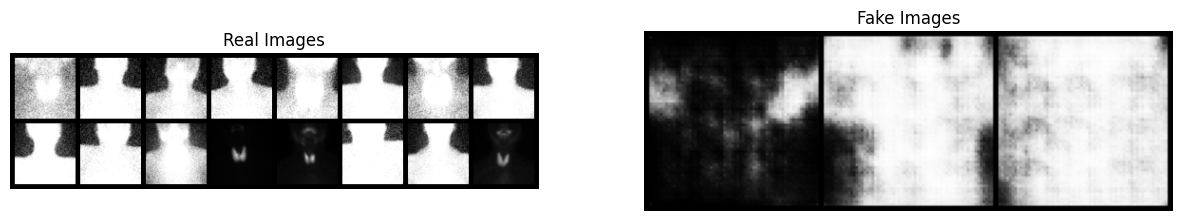

In [ ]:
# Calling function test2
test2(generator, discriminator, num_epochs, metrics, train_loader)

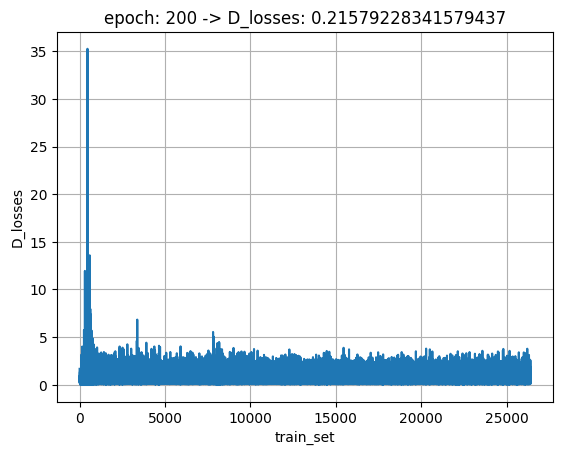

In [ ]:
# Calling function save_model
save_model(generator, discriminator, optimizerG, optimizerD, metrics, num_epochs)

In [27]:
# Number of tes samples to genereate
test_batch = 4
# Flag to toggle between testing fake images(1) or real images
test_fake = 1

if test_fake:
  #check for fake image
  test_img_list = []
  test_noise = torch.randn(test_batch, nz, 1, 1, device=device)
  test_img = generator(test_noise)#.detach().cpu()

else:
  #check for real image
  test_loader = torch.utils.data.DataLoader(train_set, batch_size=test_batch,
                                            shuffle=True)
  data = next(iter(test_loader))
  test_noise, test_class_lable = data
  test_img.data.resize_(test_noise.size()).copy_(test_noise)
  #print(data[0].size())
  print('class label for real', test_class_lable)

s_output,c_label_op = discriminator(test_img.detach().to(device))
print('Discriminator s o/p', s_output)
print('Discriminator c o/p', c_label_op)

# label = np.random.randint(0, nb_label, batch_size)
# c_label.data.resize_(batch_size).copy_(torch.from_numpy(label))
# print(c_label)

test_img = test_img.detach().cpu()
test_img_list.append(vutils.make_grid(test_img, padding=2, normalize=True))
plt.imshow(np.transpose(test_img_list[-1],(1,2,0)))

NameError: name 'generator' is not defined